In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.fpm import FPGrowth
import random

# Create SparkSession
spark = SparkSession.builder \
    .appName("FP-Growth Example") \
    .getOrCreate()

# Number of customers
num_customers = 100

# Max length of itemsets for each customer
max_itemset_length = 5

# Generate sample data
data = []
for customer_id in range(1, num_customers + 1):
    num_items = random.randint(1, max_itemset_length)
    items = list(set([f"item_{random.randint(1, 10)}" for _ in range(num_items)]))
    data.append((customer_id, items))

# Create DataFrame
schema = ["customer_id", "items"]
df = spark.createDataFrame(data, schema)

# Show generated dataset
print("Generated Sample Dataset:")
df.show(truncate=False)

# Create FP-Growth model
fp_growth = FPGrowth(itemsCol="items", minSupport=0.1, minConfidence=0.5)

# Fit the model
model = fp_growth.fit(df)

# Display frequent itemsets
print("\nFrequent Itemsets:")
model.freqItemsets.show(truncate=False)

# Display association rules
print("\nAssociation Rules:")
model.associationRules.show(truncate=False)

# Transform the original dataset with the fitted model
transformed = model.transform(df)

# Show predictions
print("\nPredictions:")
transformed.show(truncate=False)


24/04/09 13:01:15 WARN Utils: Your hostname, datachef resolves to a loopback address: 127.0.1.1; using 172.24.139.140 instead (on interface eth0)
24/04/09 13:01:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/09 13:01:26 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Generated Sample Dataset:


+-----------+-----------------------------------------+
|customer_id|items                                    |
+-----------+-----------------------------------------+
|1          |[item_4, item_2, item_9, item_3]         |
|2          |[item_1, item_6, item_3, item_5]         |
|3          |[item_10, item_2, item_6, item_7, item_5]|
|4          |[item_4, item_2, item_6, item_8]         |
|5          |[item_6]                                 |
|6          |[item_1, item_3]                         |
|7          |[item_1, item_2, item_9, item_5, item_3] |
|8          |[item_5, item_7]                         |
|9          |[item_2, item_6]                         |
|10         |[item_3]                                 |
|11         |[item_4]                                 |
|12         |[item_1, item_4, item_7, item_9]         |
|13         |[item_2, item_10, item_3]                |
|14         |[item_10, item_4, item_9, item_8, item_3]|
|15         |[item_1, item_10, item_7, item_3]  


Frequent Itemsets:


+----------------+----+
|items           |freq|
+----------------+----+
|[item_2]        |31  |
|[item_3]        |31  |
|[item_3, item_2]|12  |
|[item_4]        |30  |
|[item_6]        |30  |
|[item_9]        |30  |
|[item_9, item_3]|11  |
|[item_9, item_6]|10  |
|[item_9, item_2]|10  |
|[item_5]        |29  |
|[item_5, item_9]|10  |
|[item_5, item_3]|12  |
|[item_5, item_2]|10  |
|[item_1]        |27  |
|[item_1, item_3]|12  |
|[item_7]        |24  |
|[item_10]       |22  |
|[item_8]        |21  |
+----------------+----+


Association Rules:
+----------+----------+----------+----+-------+
|antecedent|consequent|confidence|lift|support|
+----------+----------+----------+----+-------+
+----------+----------+----------+----+-------+


Predictions:
+-----------+-----------------------------------------+----------+
|customer_id|items                                    |prediction|
+-----------+-----------------------------------------+----------+
|1          |[item_4, item_2, item_9, item_

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 59572)
Traceback (most recent call last):
  File "/usr/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/mnt/c/Users/aliyz/OneDrive/Desktop/Repos/Campina/Blog/.venv/lib/python3.10/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/mnt/c/Users/aliyz/OneDrive/Desktop/Repos/Campina/Blog/.venv/lib/python3.10/site-packages/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
  File "/mnt/c/Users/aliyz/O

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.fpm import FPGrowth
import random

# Create SparkSession
spark = SparkSession.builder \
    .appName("FP-Growth Example") \
    .getOrCreate()

# Number of customers
num_customers = 100

# Max length of itemsets for each customer
max_itemset_length = 5

# Generate sample data
data = []
for customer_id in range(1, num_customers + 1):
    num_items = random.randint(1, max_itemset_length)
    
    # Define items with different probabilities
    items = []
    for _ in range(num_items):
        item_prob = random.random()  # Random probability for item selection
        if item_prob < 0.4:  # 40% chance of item_1
            items.extend(["item_1", "item_3"])
        elif item_prob < 0.7:  # 30% chance of item_2
            items.extend(["item_2", "item_4", "item_7"])
        else:  # 30% chance of other items
            items.append(f"item_{random.randint(3, 10)}")
    items = list(set(items))
    
    data.append((customer_id, items))

# Create DataFrame
schema = ["customer_id", "items"]
df = spark.createDataFrame(data, schema)

# Show generated dataset
print("Generated Sample Dataset:")
df.show(truncate=False)

# Create FP-Growth model
fp_growth = FPGrowth(itemsCol="items", minSupport=0.1, minConfidence=0.5)

# Fit the model
model = fp_growth.fit(df)

# Display frequent itemsets
print("\nFrequent Itemsets:")
model.freqItemsets.show(truncate=False)

# Display association rules
print("\nAssociation Rules:")
model.associationRules.show(truncate=False)

# Transform the original dataset with the fitted model
transformed = model.transform(df)

# Show predictions
print("\nPredictions:")
transformed.show(truncate=False)


Generated Sample Dataset:
+-----------+------------------------------------------------+
|customer_id|items                                           |
+-----------+------------------------------------------------+
|1          |[item_3, item_1]                                |
|2          |[item_3, item_1, item_8]                        |
|3          |[item_5, item_3, item_1, item_7]                |
|4          |[item_3, item_1]                                |
|5          |[item_2, item_6, item_3, item_7, item_1, item_4]|
|6          |[item_2, item_7, item_4, item_6]                |
|7          |[item_3, item_1, item_4]                        |
|8          |[item_2, item_3, item_7, item_9, item_1, item_4]|
|9          |[item_2, item_3, item_7, item_1, item_4]        |
|10         |[item_2, item_3, item_7, item_1, item_4]        |
|11         |[item_2, item_3, item_7, item_8, item_1, item_4]|
|12         |[item_2, item_6, item_3, item_7, item_1, item_4]|
|13         |[item_2, item_3,

+--------------------------------+----+
|items                           |freq|
+--------------------------------+----+
|[item_3]                        |72  |
|[item_1]                        |71  |
|[item_1, item_3]                |71  |
|[item_4]                        |63  |
|[item_4, item_1]                |42  |
|[item_4, item_1, item_3]        |42  |
|[item_4, item_3]                |42  |
|[item_7]                        |62  |
|[item_7, item_4]                |57  |
|[item_7, item_4, item_1]        |37  |
|[item_7, item_4, item_1, item_3]|37  |
|[item_7, item_4, item_3]        |37  |
|[item_7, item_1]                |39  |
|[item_7, item_1, item_3]        |39  |
|[item_7, item_3]                |39  |
|[item_2]                        |57  |
|[item_2, item_4]                |57  |
|[item_2, item_4, item_1]        |37  |
|[item_2, item_4, item_1, item_3]|37  |
|[item_2, item_4, item_3]        |37  |
+--------------------------------+----+
only showing top 20 rows


Association R

1.691096305847168


1.7916088104248047


1.8470289707183838


3.95654296875


24/04/09 13:28:00 WARN TaskSetManager: Stage 217 contains a task of very large size (1681 KiB). The maximum recommended task size is 1000 KiB.
24/04/09 13:28:02 WARN TaskSetManager: Stage 218 contains a task of very large size (1681 KiB). The maximum recommended task size is 1000 KiB.
24/04/09 13:28:02 WARN TaskSetManager: Stage 219 contains a task of very large size (1681 KiB). The maximum recommended task size is 1000 KiB.
24/04/09 13:28:03 WARN TaskSetManager: Stage 221 contains a task of very large size (1681 KiB). The maximum recommended task size is 1000 KiB.


31.231619119644165


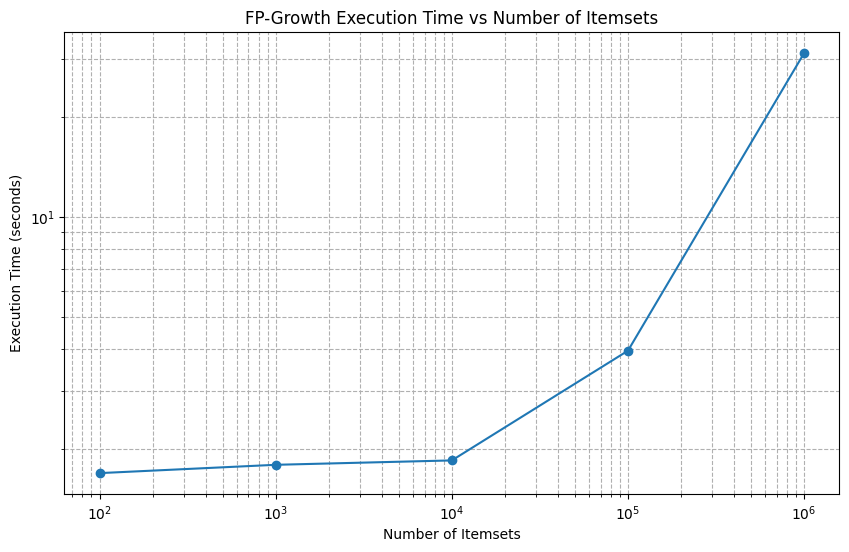

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.fpm import FPGrowth
import random
import time
import matplotlib.pyplot as plt

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("FP-Growth Example") \
    .getOrCreate()

# Function to run FP-Growth for varying number of customers
def run_fp_growth(num_customers):
    data = []
    max_itemset_length = 10
    for customer_id in range(1, num_customers + 1):
        num_items = random.randint(1, max_itemset_length)
        items = []
        for _ in range(num_items):
            item_prob = random.random()
            if item_prob < 0.4:
                items.extend(["item_1", "item_3"])
            elif item_prob < 0.7:
                items.extend(["item_2", "item_4", "item_7"])
            else:
                items.append(f"item_{random.randint(3, 10)}")
        items = list(set(items))
        data.append((customer_id, items))

    schema = ["customer_id", "items"]
    df = spark.createDataFrame(data, schema)

    fp_growth = FPGrowth(itemsCol="items", minSupport=0.3, minConfidence=0.8)
    model = fp_growth.fit(df)

    transformed = model.transform(df)
    return transformed

# Numbers of customers to test
num_customers_list = [100, 1_000, 10_000, 100_000, 1_000_000]
execution_times = []

# Time and run FP-Growth for each number of customers
for num_customers in num_customers_list:
    start_time = time.time()
    _ = run_fp_growth(num_customers)
    execution_time = time.time() - start_time
    print(execution_time)
    execution_times.append(execution_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_customers_list, execution_times, marker='o', linestyle='-')
plt.xlabel('Number of Itemsets')
plt.ylabel('Execution Time (seconds)')
plt.title('FP-Growth Execution Time vs Number of Itemsets')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.savefig('./time.png', dpi=600)
plt.show()

In [13]:
random.choice([1,2,3])

2

time: 2.0826475620269775


time: 2.5357627868652344


time: 2.73958683013916


time: 46.41014385223389


time: 74.79073810577393


time: 193.29088878631592


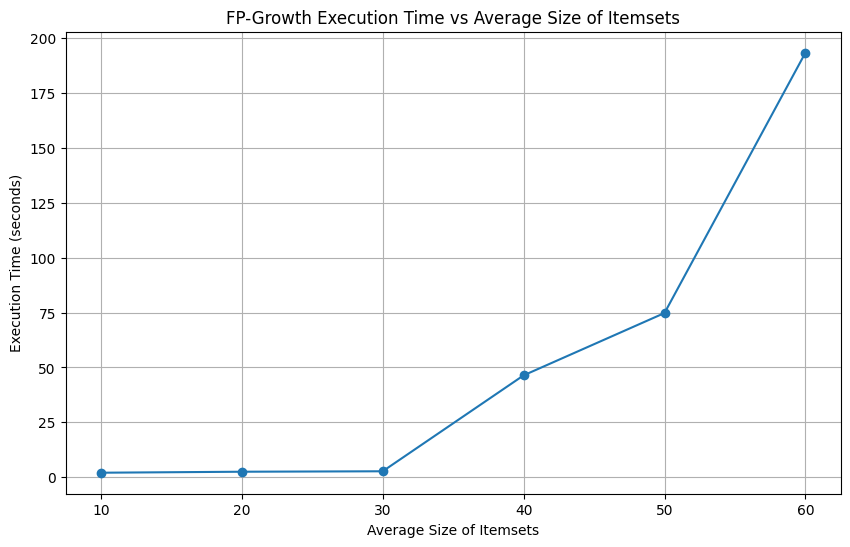

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.fpm import FPGrowth
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("FP-Growth Example") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g")  \
    .getOrCreate()

# Function to run FP-Growth for varying median sizes of itemsets
def run_fp_growth(num_customers, median_itemset_size):
    data = []
    std_dev = 5  # Standard deviation for itemset size distribution
    total_items = 100  # Total unique items available for sampling
    
    # Create a pool of unique items
    item_pool = [f"item_{i+1}" for i in range(total_items)]

    for customer_id in range(1, num_customers + 1):
        # Generate itemset size from a normal distribution centered at median_itemset_size
        num_items = int(np.random.normal(median_itemset_size, std_dev))
        num_items = max(1, min(num_items, total_items))  # Ensure num_items is within a reasonable range

        # Randomly sample items based on the generated itemset size
        items = random.sample(item_pool, num_items)

        data.append((customer_id, items))

    schema = ["customer_id", "items"]
    df = spark.createDataFrame(data, schema)

    fp_growth = FPGrowth(itemsCol="items", minSupport=0.3, minConfidence=0.8)
    model = fp_growth.fit(df)

    transformed = model.transform(df)
    return transformed

# Median sizes of itemsets to test
median_sizes = [10, 20, 30, 40, 50, 60]
execution_times = []

# Time and run FP-Growth for each median size of itemsets
num_customers = 10000
for median_size in median_sizes:
    start_time = time.time()
    _ = run_fp_growth(num_customers, median_size)
    execution_time = time.time() - start_time
    print(f"time: {execution_time}")
    execution_times.append(execution_time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(median_sizes, execution_times, marker='o', linestyle='-')
plt.xlabel('Average Size of Itemsets')
plt.ylabel('Execution Time (seconds)')
plt.title('FP-Growth Execution Time vs Average Size of Itemsets')
plt.grid(True)
plt.savefig('./average_size_vs_time.png', dpi=600)
plt.show()
